Welcome to the first assignment of EPI7913!

# Overview of the Assignment
In this assignment, you'll do some exploratory / descriptive analysis of the dataset.

In this assignment, we will test your knowledge about the following topics:

- Data exploration
  - Have a first look of the data and get the summary information of each variables.
  - Tabulate the data for categorical variables.
  - Generate violin plots for the continuous variables.
  
- Data descriptive analysis, _i.e._ Identify problematic variables:
  - High missingness
  - Highly imbalanced data
  - Extreme outliers
  - Inconsistent coding
  - Data redundancy

## N0147 data: the control arm of a colon cancer trial

For this assignment, we will use a synthetic version of the `N0147` data with some introduced data problems. More details about this data can be found [here](https://pubmed.ncbi.nlm.nih.gov/30297240/)

# Import Packages

We'll first import all the packages that we need for this assignment.

- `dplyr` is what we'll use to manipulate our data. For more details, see [dplyr](https://dplyr.tidyverse.org/)
- `ggplot2` is a plotting library. For more details, see [ggplot2](https://ggplot2.tidyverse.org/)


In [1]:
install.packages("tidyverse")
library(dplyr)
library(ggplot2)

Installing package into ‘/home/jupyter-sabdu070/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Load Data

First we will load in the dataset that we will use for training and testing our model.


In [2]:
data <- read.csv("n0147_syn_issue.csv", header = T, stringsAsFactors = TRUE)

# Explore the Dataset

## Summary table

The dataset include the following fields (you can view this as a data dictionary):

- `arm`: Labels of experimental arms, this dataset contains arms A, B, and C.
- `ps`: ECOG Performance Status: 0 = 0, 1 = 1, 2 = 2+.
- `stage_g`: Clinical T Stage: 1 = T1 or T2, 2 = T3, 3 = T4.
- `wild`: Biomarker KRAS: 0 = Mutant, 1 = Wild-type, Missing = indeterminate.
- `histo_g`: Histology: 1=High (poorly differentiated or undifferentiated), 2=Low (well or moderately differentiated).
- `nodes`: Positive lymph node involvement: 1 = 1-3, 2 = >=4.
- `bwl_obs`: Bowel obstruction : 1=Yes, 2=No.
- `age`: Age.
- `agecat`: Age category: < 40, 40-69, >=70.
- `sex`: Sex: m=Male, f=Female.
- `bmi2`: Body mass index (BMI).
- `logbmi`: The logarithm of `bmi2`.
- `racecat`: Race: b=black, w=white, oth=other.
- `numcycle`: Total Number of Cycles Given.
- `dfsstat5`: Disease free survival status (5yr censor): 0 = Event-Free, 1 = Event.
- `fustat8`: Overall survival status (8 year censor): 0 = Alive, 1 = Dead.
- `dfstime5`: Time in days of disease free survival.
- `futime8`: Time in days of overall survival.

We first get the number of subjects (`nSub`) and number of variables (`nVar`) of this dataset.


In [3]:
nSub <- nrow(data)
nVar <- ncol(data)

nSub
nVar

[1] 1467

[1] 18

We can use the `head()` method to display the first six records of each. 



In [4]:
head(data)

,arm,ps,stage_g,wild,histo_g,nodes,bwl_obs,age,agecat,sex,bmi2,logbmi,racecat,numcycle,dfsstat5,fustat8,dfstime5,futime8
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<dbl>,<int>
1,A,0,2,NA,1,NA,2,58,40-69,m,24.11677,3.182907,w,12,0,0,932.7177,931
2,A,0,1,NA,2,1,2,60,40-69,f,29.61410,3.388251,w,12,0,0,408.6510,460
3,C,1,3,NA,1,2,2,41,40-69,m,NA,NA,oth,12,0,0,1666.3546,2341
4,A,0,2,NA,2,NA,2,70,>= 70,f,21.22169,3.055024,w,12,0,0,896.0984,899
5,B,1,2,NA,2,1,2,64,40-69,f,27.30312,3.307001,w,12,1,1,451.0786,990
6,A,0,2,1,2,2,2,46,40-69,f,NA,NA,w,12,0,0,971.9287,981


We can use the `summary()` method to display the summary information. 



In [5]:
summary(data)

 arm            ps            stage_g           wild           histo_g     
 A:1272   Min.   :0.0000   Min.   :1.000   Min.   :0.0000   Min.   :1.000  
 B: 105   1st Qu.:0.0000   1st Qu.:2.000   1st Qu.:0.0000   1st Qu.:2.000  
 C:  90   Median :0.0000   Median :2.000   Median :1.0000   Median :2.000  
          Mean   :0.2461   Mean   :1.955   Mean   :0.6835   Mean   :1.755  
          3rd Qu.:0.0000   3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.:2.000  
          Max.   :2.0000   Max.   :3.000   Max.   :1.0000   Max.   :2.000  
                           NA's   :293     NA's   :734      NA's   :147    
     nodes          bwl_obs           age          agecat         sex     
 Min.   :1.000   Min.   :1.000   Min.   :20.00   < 40 :  84   f     :597  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:47.00   >= 70: 177   F     : 54  
 Median :1.000   Median :2.000   Median :56.00   40-69:1206   female:  6  
 Mean   :1.429   Mean   :1.836   Mean   :56.83                m     :775  
 3rd Qu.:2.000   

The function `str()` is another helpful one to display the summary information, especially data type of each variable. 



In [6]:
str(data)

'data.frame':	1467 obs. of  18 variables:
 $ arm     : Factor w/ 3 levels "A","B","C": 1 1 3 1 2 1 1 1 2 1 ...
 $ ps      : int  0 0 1 0 1 0 0 0 1 0 ...
 $ stage_g : int  2 1 3 2 2 2 2 NA NA 1 ...
 $ wild    : int  NA NA NA NA NA 1 NA NA NA 1 ...
 $ histo_g : int  1 2 1 2 2 2 2 2 2 2 ...
 $ nodes   : int  NA 1 2 NA 1 2 2 2 NA 1 ...
 $ bwl_obs : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age     : int  58 60 41 70 64 46 69 99 43 56 ...
 $ agecat  : Factor w/ 3 levels "< 40",">= 70",..: 3 3 3 2 3 3 3 2 3 3 ...
 $ sex     : Factor w/ 6 levels "f","F","female",..: 4 1 4 1 1 1 1 1 1 1 ...
 $ bmi2    : num  24.1 29.6 NA 21.2 27.3 ...
 $ logbmi  : num  3.18 3.39 NA 3.06 3.31 ...
 $ racecat : Factor w/ 3 levels "b","oth","w": 3 3 2 3 3 3 3 3 3 3 ...
 $ numcycle: int  12 12 12 12 12 12 12 12 12 12 ...
 $ dfsstat5: int  0 0 0 0 1 0 0 0 0 1 ...
 $ fustat8 : int  0 0 0 0 1 0 0 0 0 0 ...
 $ dfstime5: num  933 409 1666 896 451 ...
 $ futime8 : int  931 460 2341 899 990 981 503 502 2341 803 ...


You can see that by setting `stringsAsFactors = TRUE` when we read in the data, variables `arm`, `agecat`, `sex`, and `racecat` have been recognized as categorical variables automatically (data type as `Factor`). However, there are a few categorical variables still in `int`, and we need to transform them into `Factor`.

__Question 1: __ Follow the example we have in the below cell, identify other variables that need to be transformed and do the transformation. Don't forget to use `str()` afterwards to make sure you have done it properly.

_Hint: _ Please read the data dictionary carefully to determine the right type of each variable.


In [7]:
# Example for Question 1
data$fustat8 <- as.factor(data$fustat8)

In [8]:
### START CODE HERE ###  
data$ps <- as.factor(data$ps)
data$stage_g <- as.factor(data$stage_g)
data$wild <- as.factor(data$wild)
data$histo_g <- as.factor(data$histo_g)
data$nodes <- as.factor(data$nodes)
data$bwl_obs <- as.factor(data$bwl_obs)
data$dfsstat5 <- as.factor(data$dfsstat5)
data$dfsstat5 <- as.factor(data$dfsstat5)
str(data)
### END CODE HERE ###

'data.frame':	1467 obs. of  18 variables:
 $ arm     : Factor w/ 3 levels "A","B","C": 1 1 3 1 2 1 1 1 2 1 ...
 $ ps      : Factor w/ 3 levels "0","1","2": 1 1 2 1 2 1 1 1 2 1 ...
 $ stage_g : Factor w/ 3 levels "1","2","3": 2 1 3 2 2 2 2 NA NA 1 ...
 $ wild    : Factor w/ 2 levels "0","1": NA NA NA NA NA 2 NA NA NA 2 ...
 $ histo_g : Factor w/ 2 levels "1","2": 1 2 1 2 2 2 2 2 2 2 ...
 $ nodes   : Factor w/ 2 levels "1","2": NA 1 2 NA 1 2 2 2 NA 1 ...
 $ bwl_obs : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ age     : int  58 60 41 70 64 46 69 99 43 56 ...
 $ agecat  : Factor w/ 3 levels "< 40",">= 70",..: 3 3 3 2 3 3 3 2 3 3 ...
 $ sex     : Factor w/ 6 levels "f","F","female",..: 4 1 4 1 1 1 1 1 1 1 ...
 $ bmi2    : num  24.1 29.6 NA 21.2 27.3 ...
 $ logbmi  : num  3.18 3.39 NA 3.06 3.31 ...
 $ racecat : Factor w/ 3 levels "b","oth","w": 3 3 2 3 3 3 3 3 3 3 ...
 $ numcycle: int  12 12 12 12 12 12 12 12 12 12 ...
 $ dfsstat5: Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 2 

Re-run the `summary()` method to display the summary information of current dataframe. You will need this summary table to answer some of the questions below.



In [9]:
summary(data)

 arm      ps       stage_g      wild     histo_g     nodes     bwl_obs 
 A:1272   0:1111   1   :169   0   :232   1   :323   1   :586   1: 241  
 B: 105   1: 351   2   :889   1   :501   2   :997   2   :441   2:1226  
 C:  90   2:   5   3   :116   NA's:734   NA's:147   NA's:440           
                   NA's:293                                            
                                                                       
                                                                       
                                                                       
      age          agecat         sex           bmi2             logbmi     
 Min.   :20.00   < 40 :  84   f     :597   Min.   :  17.15   Min.   :2.842  
 1st Qu.:47.00   >= 70: 177   F     : 54   1st Qu.:  23.60   1st Qu.:3.161  
 Median :56.00   40-69:1206   female:  6   Median :  26.90   Median :3.292  
 Mean   :56.83                m     :775   Mean   : 220.46   Mean   :3.400  
 3rd Qu.:65.00                M     : 2

## Data issues

### Missing data

We have talked about missing data and different types of missingness in the class.

__Question 2: __ Calculate the percentage of missing data in each variable and rank them (from high to low).

_Hint: _

- For calculating the percentage of missing data in each variable, [see here](https://stackoverflow.com/questions/33512837/calculate-using-dplyr-percentage-of-nas-in-each-column).
- We only consider `NA` as missing at this step.
- For sorting vector, [see here](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sort).


In [10]:
### START CODE HERE ###  
missing_percent <- colMeans(is.na(data))
sort(missing_percent, decreasing = TRUE)
#or
missing_data_df <- data.frame(Variable = names(missing_percent), Percent_Missing = missing_percent)
missing_data_df <- missing_data_df[order(-missing_data_df$Percent_Missing),]
print(missing_data_df)
### END CODE HERE ###

wild     nodes      bmi2    logbmi   stage_g   histo_g       arm        ps 
0.5003408 0.2999318 0.2965235 0.2965235 0.1997273 0.1002045 0.0000000 0.0000000 
  bwl_obs       age    agecat       sex   racecat  numcycle  dfsstat5   fustat8 
0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 
 dfstime5   futime8 
0.0000000 0.0000000

         Variable Percent_Missing
wild         wild       0.5003408
nodes       nodes       0.2999318
bmi2         bmi2       0.2965235
logbmi     logbmi       0.2965235
stage_g   stage_g       0.1997273
histo_g   histo_g       0.1002045
arm           arm       0.0000000
ps             ps       0.0000000
bwl_obs   bwl_obs       0.0000000
age           age       0.0000000
agecat     agecat       0.0000000
sex           sex       0.0000000
racecat   racecat       0.0000000
numcycle numcycle       0.0000000
dfsstat5 dfsstat5       0.0000000
fustat8   fustat8       0.0000000
dfstime5 dfstime5       0.0000000
futime8   futime8       0.0000000


### Highly imbalanced data

__Question 3: __ Looking at the summary table above, do you think the dataset is highly imbalanced? If yes, which variable(s) is/are imbalanced? Please just add your answer in this cell.

_Answer: The following variables in my opinion are imbalanced. I'm not sure what threshold to use as "highly imbalanced" some do 1:10, others 2:3, the following to me are highly imbalanced: arm, ps, stage_g, histo_g, bwl_obs, agecat, bmi2 (probably outlier), logbmi (probably just outlier) racecat, dfsstat5, and fustat8.

### Extreme outliers

__Question 4: __ Can you identify a variable that contains extreme outliers? Please remove the outliers.

_Hint: _ It is a common practice in clinical trials that missing data of continuous variables are labeled as `9999`.


In [11]:
### START CODE HERE  (REPLACE INSTANCES OF 'None' with your code) ###  

# Define the maximum allowed value of the variable you find.
max <- 9999

# set values above max as NA

data$bmi2[which(data$bmi2 >= max)] <- NA
summary(data)
### END CODE HERE ###

 arm      ps       stage_g      wild     histo_g     nodes     bwl_obs 
 A:1272   0:1111   1   :169   0   :232   1   :323   1   :586   1: 241  
 B: 105   1: 351   2   :889   1   :501   2   :997   2   :441   2:1226  
 C:  90   2:   5   3   :116   NA's:734   NA's:147   NA's:440           
                   NA's:293                                            
                                                                       
                                                                       
                                                                       
      age          agecat         sex           bmi2           logbmi     
 Min.   :20.00   < 40 :  84   f     :597   Min.   :17.15   Min.   :2.842  
 1st Qu.:47.00   >= 70: 177   F     : 54   1st Qu.:23.51   1st Qu.:3.161  
 Median :56.00   40-69:1206   female:  6   Median :26.78   Median :3.292  
 Mean   :56.83                m     :775   Mean   :27.20   Mean   :3.400  
 3rd Qu.:65.00                M     : 20   3rd Qu

__Question 5: __ A variable in this dataset is derived from the above variable with outliers. Please update the derived variable in the cell below.



In [12]:
### START CODE HERE ###  
data$logbmi <- log(data$bmi2)
summary(data)
### END CODE HERE ###

 arm      ps       stage_g      wild     histo_g     nodes     bwl_obs 
 A:1272   0:1111   1   :169   0   :232   1   :323   1   :586   1: 241  
 B: 105   1: 351   2   :889   1   :501   2   :997   2   :441   2:1226  
 C:  90   2:   5   3   :116   NA's:734   NA's:147   NA's:440           
                   NA's:293                                            
                                                                       
                                                                       
                                                                       
      age          agecat         sex           bmi2           logbmi     
 Min.   :20.00   < 40 :  84   f     :597   Min.   :17.15   Min.   :2.842  
 1st Qu.:47.00   >= 70: 177   F     : 54   1st Qu.:23.51   1st Qu.:3.158  
 Median :56.00   40-69:1206   female:  6   Median :26.78   Median :3.288  
 Mean   :56.83                m     :775   Mean   :27.20   Mean   :3.285  
 3rd Qu.:65.00                M     : 20   3rd Qu

### Inconsistent coding

__Question 6: __ Looking at the summary table above, can you identify a variable that has inconsistent coding/categories comparing with the data dictionary? Modify the variable in the cell below. Don't forget to call `summary()` on this variable to make sure that you have done it properly.


In [13]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###  

# Repeat below code until you correct all the inconsistent categories of the problematic variable.
data$sex[which(data$sex == "F")] <- "f"
data$sex[which(data$sex == "M")] <- "m"
data$sex[which(data$sex == "female")] <- "f"
data$sex[which(data$sex == "male")] <- "m"

summary(data$sex)
summary(data)

### END CODE HERE ###

f      F female      m      M   male 
   657      0      0    810      0      0

 arm      ps       stage_g      wild     histo_g     nodes     bwl_obs 
 A:1272   0:1111   1   :169   0   :232   1   :323   1   :586   1: 241  
 B: 105   1: 351   2   :889   1   :501   2   :997   2   :441   2:1226  
 C:  90   2:   5   3   :116   NA's:734   NA's:147   NA's:440           
                   NA's:293                                            
                                                                       
                                                                       
                                                                       
      age          agecat         sex           bmi2           logbmi     
 Min.   :20.00   < 40 :  84   f     :657   Min.   :17.15   Min.   :2.842  
 1st Qu.:47.00   >= 70: 177   F     :  0   1st Qu.:23.51   1st Qu.:3.158  
 Median :56.00   40-69:1206   female:  0   Median :26.78   Median :3.288  
 Mean   :56.83                m     :810   Mean   :27.20   Mean   :3.285  
 3rd Qu.:65.00                M     :  0   3rd Qu

__Note: __ to remove the empty categories, you can use the function `droplevels()`.



In [14]:
data <- droplevels(data)
summary(data)

 arm      ps       stage_g      wild     histo_g     nodes     bwl_obs 
 A:1272   0:1111   1   :169   0   :232   1   :323   1   :586   1: 241  
 B: 105   1: 351   2   :889   1   :501   2   :997   2   :441   2:1226  
 C:  90   2:   5   3   :116   NA's:734   NA's:147   NA's:440           
                   NA's:293                                            
                                                                       
                                                                       
                                                                       
      age          agecat     sex          bmi2           logbmi     
 Min.   :20.00   < 40 :  84   f:657   Min.   :17.15   Min.   :2.842  
 1st Qu.:47.00   >= 70: 177   m:810   1st Qu.:23.51   1st Qu.:3.158  
 Median :56.00   40-69:1206           Median :26.78   Median :3.288  
 Mean   :56.83                        Mean   :27.20   Mean   :3.285  
 3rd Qu.:65.00                        3rd Qu.:30.16   3rd Qu.:3.406  
 Max

### Redundant variable

__Question 7: __ Looking at the summary table above, can you identify a redundant variable that has no variance at all? If yes, replace `None` in the cell below with the variable name. 

_Hint: _ If you need help with the `dplyr::select` function, [see here](https://dplyr.tidyverse.org/reference/select.html).


In [15]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###  

data <- data %>% select(- numcycle)
summary(data)

### END CODE HERE ###

 arm      ps       stage_g      wild     histo_g     nodes     bwl_obs 
 A:1272   0:1111   1   :169   0   :232   1   :323   1   :586   1: 241  
 B: 105   1: 351   2   :889   1   :501   2   :997   2   :441   2:1226  
 C:  90   2:   5   3   :116   NA's:734   NA's:147   NA's:440           
                   NA's:293                                            
                                                                       
                                                                       
                                                                       
      age          agecat     sex          bmi2           logbmi     
 Min.   :20.00   < 40 :  84   f:657   Min.   :17.15   Min.   :2.842  
 1st Qu.:47.00   >= 70: 177   m:810   1st Qu.:23.51   1st Qu.:3.158  
 Median :56.00   40-69:1206           Median :26.78   Median :3.288  
 Mean   :56.83                        Mean   :27.20   Mean   :3.285  
 3rd Qu.:65.00                        3rd Qu.:30.16   3rd Qu.:3.406  
 Max

We can also examine bivariate correlations and see if there is redundancy.

__Note: __ 

- The function `cor()` only works on continuous variables. For correlations between two categorical variables, and a categorical variable and continuous variable, see [here](https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab) and [here](https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365)
- Your answer of Question 1 will affect the results of below cell, please make sure to re-run the cell.


In [16]:
data_cnt <- data %>% select(where(is.numeric))
cor(data_cnt, use = "complete.obs")

,age,bmi2,logbmi,dfstime5,futime8
age,1.000000000,-0.007216356,-0.009249236,0.052900495,0.01595003
bmi2,-0.007216356,1.000000000,0.991994881,0.000346873,0.01587569
logbmi,-0.009249236,0.991994881,1.000000000,0.011542075,0.02591424
dfstime5,0.052900495,0.000346873,0.011542075,1.000000000,0.87091149
futime8,0.015950035,0.015875694,0.025914244,0.870911490,1.00000000


__Question 8: __ Looking at the correlation matrix above, which variable is redundant? Remove it in the cell below.

In [17]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###  

data <- data %>% select(- logbmi)
summary(data)
### END CODE HERE ###

 arm      ps       stage_g      wild     histo_g     nodes     bwl_obs 
 A:1272   0:1111   1   :169   0   :232   1   :323   1   :586   1: 241  
 B: 105   1: 351   2   :889   1   :501   2   :997   2   :441   2:1226  
 C:  90   2:   5   3   :116   NA's:734   NA's:147   NA's:440           
                   NA's:293                                            
                                                                       
                                                                       
                                                                       
      age          agecat     sex          bmi2       racecat    dfsstat5
 Min.   :20.00   < 40 :  84   f:657   Min.   :17.15   b  :  95   0:1149  
 1st Qu.:47.00   >= 70: 177   m:810   1st Qu.:23.51   oth: 118   1: 318  
 Median :56.00   40-69:1206           Median :26.78   w  :1254           
 Mean   :56.83                        Mean   :27.20                      
 3rd Qu.:65.00                        3rd Qu.:30.16   

__Question 9: __ Can you identify any other data issues beyond the ones raised in the questions above? Please name the variable and explain its issue in this cell.

_Answer: _

Variable name: wild
Issue: Missing data and incomplete data are both coded as "NA". We do not know which patients actually underwent biomarker KRAS testing with an indeterminate response (should be coded as "missing" or "2") and thoes that never underwent testing at all (should be coded as "NA").

## Data visualization 

Here we will use two types of plots:

- [Bar plot](https://ggplot2.tidyverse.org/reference/geom_bar.html) for categorical variables
- [Violin plot](https://ggplot2.tidyverse.org/reference/geom_violin.html) for continuous variables. For more details about violin plot, [see here](https://mode.com/blog/violin-plot-examples/)

__Question 10: __ Follow the example below, find another _categorical_ variable and plot the bar plot.


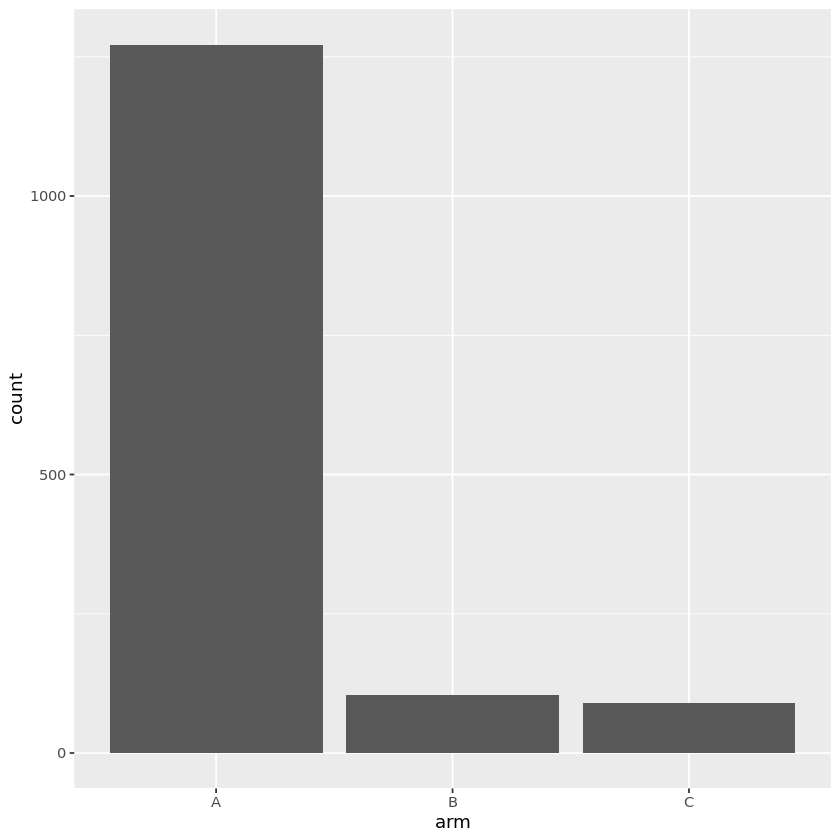

In [18]:
# Example for Question 10
ggplot(data, aes(arm)) + geom_bar()

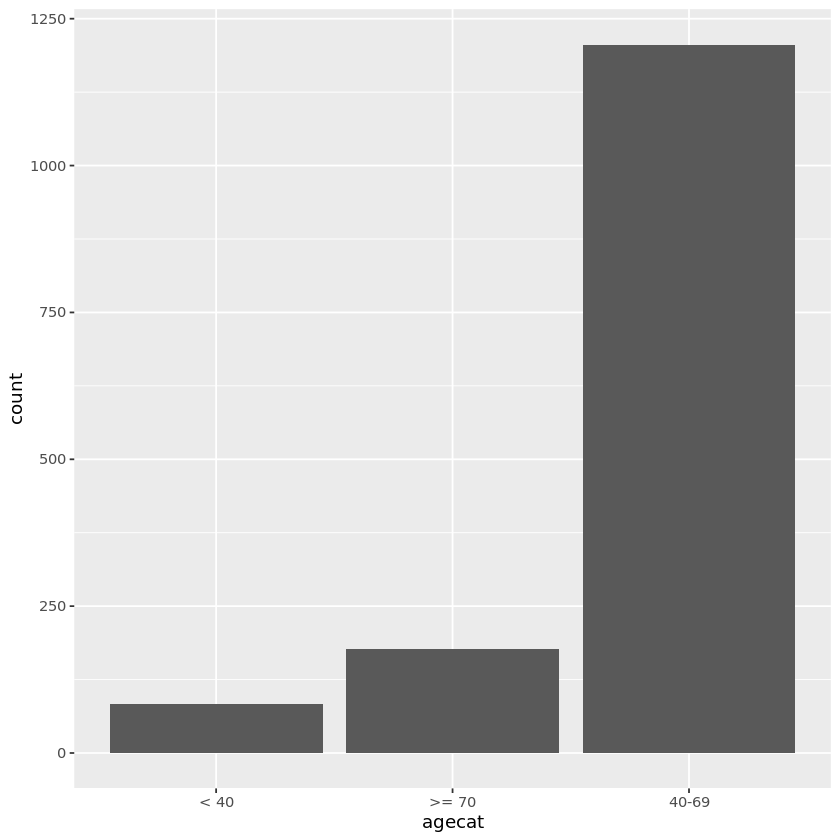

In [19]:
### START CODE HERE ###  
ggplot(data, aes(agecat)) + geom_bar()
### END CODE HERE ###

__Question 11: __ Follow the example below, find another _continuous_ variable and plot the violin plot.



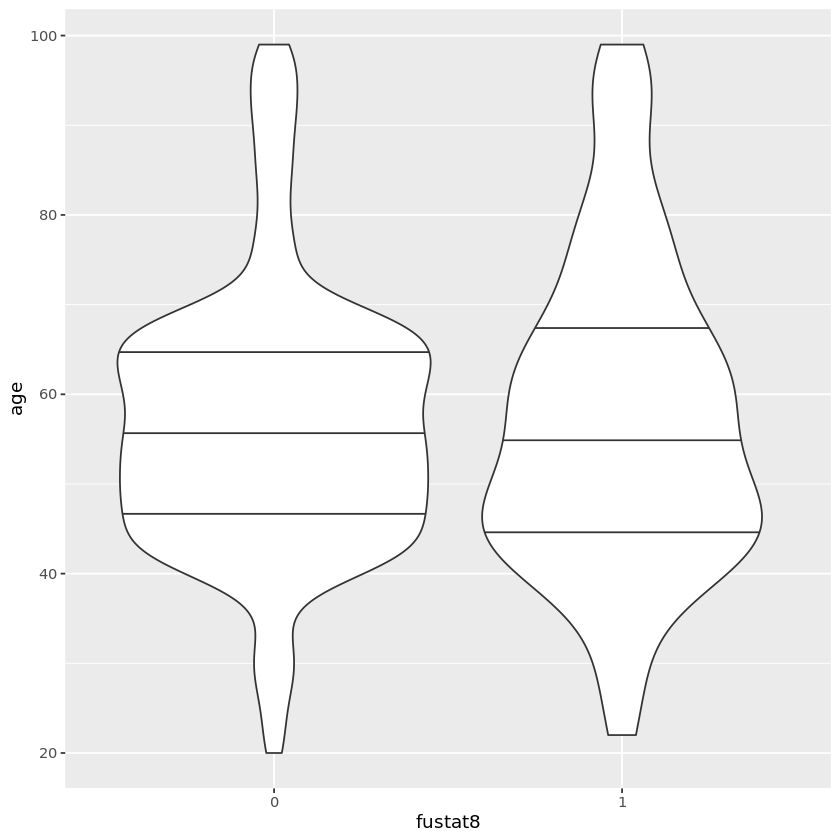

In [20]:
# Example for Question 11
ggplot(data, aes(fustat8, age)) + geom_violin(draw_quantiles = c(0.25, 0.5, 0.75))

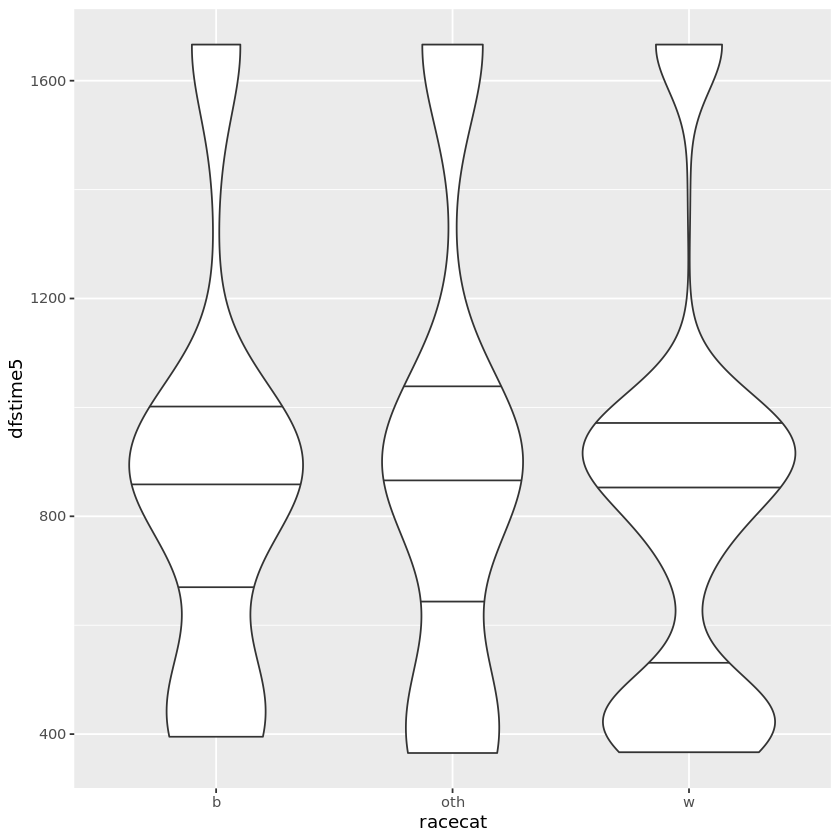

In [21]:
### START CODE HERE ###  
ggplot(data, aes(racecat, dfstime5)) + geom_violin(draw_quantiles = c(0.25, 0.5, 0.75))
### END CODE HERE ###

# Congratulations!

You have finished the first assignment of EPI7913.
